# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

### My objective is to see if school's infrastucture has a very significant effects on student's success rate. And how we could guide the government so that they can invest efficiently in school's facilities in order to improve the facillities quality of the most vulnerable schools in the  country.

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

### How's the infrastructure affects on school's results?

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


### I've got the data from the MENFP, based on a survey they've realized in all the schools of 3 departments. They wanted to register informations about these schools so that they could improve their subventions programs for the most vulnerable schools in these zones. This survey was carried out by each person in charge of the various schools in these departments. It's why  I can trust them. 

# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
# Open and explore the data provided by the MENFP
# Load the data provided by the MENFP
art2=pd.read_excel("/content/drive/MyDrive/Education1/sly.xlsx", sheet_name="Sheet1")
art1=pd.read_excel("/content/drive/MyDrive/Education1/Catine_Artibonite.xlsx", sheet_name="Sheet2")
boundaries=pd.read_csv("/content/drive/MyDrive/Education1/spa_boundaries_com.csv",)

In [ ]:
art1.head()

,Code,School_name,Unnamed: 2,Promus 2016-2017,Unnamed: 4,Redoublants 2016 – 2017,Unnamed: 6,Listes de classe 2017-2018,Unnamed: 8,Unnamed: 9,Promus 2016-2017.1,Unnamed: 11,Redoublants 2016 – 2017.1,Unnamed: 13,Listes de classe 2017-2018.1,Unnamed: 15,Unnamed: 16,Promus 2016-2017.2,Unnamed: 18,Redoublants 2016 – 2017.2,Unnamed: 20,Listes de classe 2017-2018.2,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,F,G,F,G,F,G,NaN,F,G,F,G,F,G,NaN,F,G,F,G,F,G
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARDE-01,ECOLE COMMUNAUTAIRE DE DIEGUE,NaN,44,43,0,1,36,46,NaN,4,5,1,0,8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARDE-02,INSTITUTION MIXTE ANTENOR FIRMIN,NaN,14,16,7,8,18,26,NaN,21,11,4,5,17,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
art2.head()

,Column1,No,Code,day,month,year,School_name,urban,rural,street,avenue,boulevard,other,number,commune,locality,sec_communales,commune_rural,Sex_of_the_Director,Email,Kitchen,Toilet,Toilet_clean(yes_no),toilet_operationnal,Toilet_en_bon_etat,water,number_of_water_sources,drinking_water,number_of_drinking_water_source,drinking_water_is_free_for_students,school_name2,DATE,Communes,NewColumn.ADM1_EN,NewColumn.ADM2_EN,NewColumn.geometry,NewColumn.IHSI_UNFPA_2019,NewColumn.IHSI_UNFPA_2019_female,NewColumn.IHSI_UNFPA_2019_male
0,0,1,ARDE-01,24,5,2018,ECOLE COMMUNAUTAIRE DE DIEGUE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,DIEGUE (TETE BOEUF),7EME SECTION,ST-MICHEL,H,francoisasnel88@yahoo.com,1.0,1.0,1.0,8.0,4.0,1.0,2.0,1.0,1.0,1.0,ecole communautaire de diegue,2018-05-24,ST-MICHEL DE L'ATALAYE,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,ARDE-02,25,5,2018,INSTITUTION MIXTE ANTENOR FIRMIN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,HATTE GRAND-MONT,3EME SECTION OGE,MARCHAND DESSALINES,H,NaN,1.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,institution mixte antenor firmin,2018-05-25,DESSALINES,Artibonite,DESSALINES,POLYGON ((-72.49478415299996 19.33161537500007...,215559.787159,107037.0,108521.0
2,2,3,ARDU-01,28,5,2018,ECOLE BETHESDA DE DUCLOS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,DUCLOS,DUCLOS,DESDUNES,H,NaN,1.0,1.0,1.0,4.0,4.0,1.0,6.0,1.0,3.0,1.0,ecole bethesda de duclos,2018-05-28,DESDUNES,Artibonite,DESDUNES,POLYGON ((-72.73958671099996 19.36593147100007...,43876.373845,21826.0,22050.0
3,3,4,ARDU-02,29,5,2018,INSTITUTION MIXTE LA FRATERNITE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,DESDUNES,NaN,DESDUNES,H,NaN,1.0,1.0,1.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,institution mixte la fraternite,2018-05-29,DESDUNES,Artibonite,DESDUNES,POLYGON ((-72.73958671099996 19.36593147100007...,43876.373845,21826.0,22050.0
4,4,5,ARDU-03,30,5,2018,EMMANUEL BAPTISTE CONSERVATRICE,1.0,NaN,1,NaN,NaN,NaN,27,DESDUNES,NaN,NaN,NaN,H,NaN,1.0,1.0,1.0,3.0,3.0,0.0,0.0,NaN,NaN,NaN,emmanuel baptiste conservatrice,2018-05-30,DESDUNES,Artibonite,DESDUNES,POLYGON ((-72.73958671099996 19.36593147100007...,43876.373845,21826.0,22050.0


In [ ]:
boundaries.head()

,Unnamed: 0,ADM2_PCODE,ADM1_EN,ADM1_FR,ADM2_EN,ADM2_FR,geometry,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
0,0,HT0812,Grande'Anse,Grande'Anse,Abricots,Abricots,POLYGON ((-74.25822755899998 18.65056404000006...,38701.869598,18232,20470
1,1,HT0321,North,Nord,Acul du Nord,Acul du Nord,POLYGON ((-72.35331929799997 19.78220034300006...,60758.627688,30112,30646
2,2,HT0922,North-West,Nord-Ouest,Anse-a-Foleur,Anse-à-Foleur,POLYGON ((-72.63559015099997 19.90707298500007...,36012.105155,18030,17982
3,3,HT0234,South-East,Sud-Est,Anse-a-Pitre,Anse-à-Pître,POLYGON ((-71.74679558899999 18.29270115500003...,42597.347819,21074,21524
4,4,HT1021,Nippes,Nippes,Anse-a-Veau,Anse-à-Veau,POLYGON ((-73.44109300899999 18.52472265400007...,35556.460478,16737,18820


In [ ]:
art1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code                            331 non-null    object 
 1   School_name                     331 non-null    object 
 2   Unnamed: 2                      0 non-null      float64
 3   Promus 2016-2017                223 non-null    object 
 4   Unnamed: 4                      221 non-null    object 
 5   Redoublants 2016 – 2017         221 non-null    object 
 6   Unnamed: 6                      220 non-null    object 
 7   Listes de  classe  2017-2018    288 non-null    object 
 8   Unnamed: 8                      287 non-null    object 
 9   Unnamed: 9                      0 non-null      float64
 10  Promus 2016-2017.1              103 non-null    object 
 11  Unnamed: 11                     102 non-null    object 
 12  Redoublants 2016 – 2017.1       104 

In [ ]:
art2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Column1                              326 non-null    int64  
 1   No                                   326 non-null    int64  
 2   Code                                 326 non-null    object 
 3   day                                  326 non-null    int64  
 4   month                                326 non-null    int64  
 5   year                                 326 non-null    int64  
 6   School_name                          326 non-null    object 
 7   urban                                113 non-null    float64
 8   rural                                212 non-null    float64
 9   street                               85 non-null     object 
 10  avenue                               4 non-null      object 
 11  boulevard                       

In [ ]:
boundaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              140 non-null    int64  
 1   ADM2_PCODE              140 non-null    object 
 2   ADM1_EN                 140 non-null    object 
 3   ADM1_FR                 140 non-null    object 
 4   ADM2_EN                 140 non-null    object 
 5   ADM2_FR                 140 non-null    object 
 6   geometry                140 non-null    object 
 7   IHSI_UNFPA_2019         140 non-null    float64
 8   IHSI_UNFPA_2019_female  140 non-null    int64  
 9   IHSI_UNFPA_2019_male    140 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 11.1+ KB


In [ ]:
#drop 3 first rows 
art1.drop(0,axis=0,inplace=True)
art1.drop(1,axis=0,inplace=True)
art1.drop(2,axis=0,inplace=True)

In [ ]:
#Fill the NaN values
art1.fillna(0, inplace=True)

In [ ]:
#Drop the unnecessary columns
art1.drop(columns=["Unnamed: 2","Unnamed: 9","Unnamed: 16"], inplace=True)


In [ ]:
# Display the churn dataset columns
art1.columns

Index(['Code', 'School_name', 'Promus 2016-2017', 'Unnamed: 4',
       'Redoublants 2016 – 2017', 'Unnamed: 6', 'Listes de  classe  2017-2018',
       'Unnamed: 8', 'Promus 2016-2017.1', 'Unnamed: 11',
       'Redoublants 2016 – 2017.1', 'Unnamed: 13',
       'Listes de  classe  2017-2018.1', 'Unnamed: 15', 'Promus 2016-2017.2',
       'Unnamed: 18', 'Redoublants 2016 – 2017.2', 'Unnamed: 20',
       'Listes de  classe  2017-2018.2', 'Unnamed: 22'],
      dtype='object')

In [ ]:
#rename all columns
art1.rename(columns={"Unnamed: 4":"Promus male 6th grade 2016-2017","Promus 2016-2017":"Promus female 6th grade 2016-2017","Redoublants 2016 – 2017":"Redoublants female 6th grade 2016 – 2017","Unnamed: 6":"Redoublants male 6th grade 2016 – 2017", "Listes de  classe  2017-2018":"Listes de classe female 6th grade 2017-2018","Unnamed: 8":"Listes de classe male 6th grade 2017-2018"}, inplace=True)
art1.rename(columns={"Unnamed: 11":"Promus male 9th grade 2016-2017","Promus 2016-2017.1":"Promus female 9th grade 2016-2017","Redoublants 2016 – 2017.1":"Redoublants female 9th grade 2016 – 2017","Unnamed: 13":"Redoublants male 9th grade 2016 – 2017", "Listes de  classe  2017-2018.1":"Listes de classe female 9th grade 2017-2018","Unnamed: 15":"Listes de classe male 9th grade 2017-2018"}, inplace=True)
art1.rename(columns={"Unnamed: 18":"Promus male Terminale grade 2016-2017","Promus 2016-2017.2":"Promus female Terminale grade 2016-2017","Redoublants 2016 – 2017.2":"Redoublants female Terminale grade 2016 – 2017","Unnamed: 20":"Redoublants male Terminale grade 2016 – 2017", "Listes de  classe  2017-2018.2":"Listes de classe female Terminale grade 2017-2018","Unnamed: 22":"Listes de classe male Terminale grade 2017-2018"}, inplace=True)

### Total promus by school

In [ ]:
art1['Total_promus_6th_grade_by_school']=pd.to_numeric(art1['Promus female 6th grade 2016-2017'])+pd.to_numeric(art1['Promus male 6th grade 2016-2017'])
art1['Total_promus_9th_grade_by_school']=pd.to_numeric(art1['Promus female 9th grade 2016-2017'])+pd.to_numeric(art1['Promus male 9th grade 2016-2017'])
art1['Total_promus_Terminale_grade_by_school']=pd.to_numeric(art1['Promus female Terminale grade 2016-2017'])+pd.to_numeric(art1['Promus male Terminale grade 2016-2017'])

In [ ]:
art1['Total_promus']=art1['Total_promus_6th_grade_by_school']+art1['Total_promus_9th_grade_by_school']+art1['Total_promus_Terminale_grade_by_school']


### Total redoublants by school

In [ ]:
art1['Total_redoublants_6th_by_shcool']=pd.to_numeric(art1['Redoublants female 6th grade 2016 – 2017'])+pd.to_numeric(art1['Redoublants male 6th grade 2016 – 2017'])
art1['Total_redoublants_9th_by_shcool']=pd.to_numeric(art1['Redoublants female 9th grade 2016 – 2017'])+pd.to_numeric(art1['Redoublants male 9th grade 2016 – 2017'])
art1['Total_redoublants_Terminale_by_shcool']=pd.to_numeric(art1['Redoublants female Terminale grade 2016 – 2017'])+pd.to_numeric(art1['Redoublants male Terminale grade 2016 – 2017'])

### Total list of the classes by school

In [ ]:
art1['Total_list_of_the_classes_6th_by_school']=pd.to_numeric(art1['Listes de classe female 6th grade 2017-2018'])+pd.to_numeric(art1['Listes de classe male 6th grade 2017-2018'])
art1['Total_list_of_the_classes_9th_by_school']=pd.to_numeric(art1['Listes de classe female 9th grade 2017-2018'])+pd.to_numeric(art1['Listes de classe male 9th grade 2017-2018'])
art1['Total_list_of_the_classes_Terminale_by_school']=pd.to_numeric(art1['Listes de classe female Terminale grade 2017-2018'])+pd.to_numeric(art1['Listes de classe male Terminale grade 2017-2018'])

### Success rate by school

In [ ]:
art1['Success_rate_for_the_6th_grade']=art1['Total_promus_6th_grade_by_school']/(art1['Total_promus_6th_grade_by_school']+art1['Total_redoublants_6th_by_shcool'])
art1['Success_rate_for_the_9th_grade']=art1['Total_promus_9th_grade_by_school']/(art1['Total_promus_9th_grade_by_school']+art1['Total_redoublants_9th_by_shcool'])
art1['Success_rate_for_the_Final_grade']=art1['Total_redoublants_Terminale_by_shcool']/(art1['Total_redoublants_Terminale_by_shcool']+art1['Total_list_of_the_classes_Terminale_by_school'])

### Non-success rate by school

In [ ]:
art1['Non_success_rate_for_the_6th_grade']=np.round(1-art1['Success_rate_for_the_6th_grade'],2)
art1['Non_success_rate_for_the_9th_grade']=1-art1['Success_rate_for_the_9th_grade']
art1['Non_success_rate_for_the_Final_grade']=np.round(1-art1['Success_rate_for_the_Final_grade'],2)

### Merging for the final dataset

In [ ]:
merge1=pd.merge(left=art1, right=art2,left_on="Code", right_on="Code",how="left")

In [ ]:
merge1['Rate_of_toilet_en_bon_etat']=merge1["Toilet_en_bon_etat"]/merge1["toilet_operationnal"]

### Display the head of the dataset

In [ ]:
print("The head of the dataset is:", merge1.head())

The head of the dataset is:       Code  ... Rate_of_toilet_en_bon_etat
0  ARDE-01  ...                        0.5
1  ARDE-02  ...                        0.2
2  ARDU-01  ...                        1.0
3  ARDU-02  ...                        1.0
4  ARDU-03  ...                        1.0

[5 rows x 75 columns]


### Shape of the dataset

In [ ]:
print("The shape of the dataset is:", merge1.shape)

The shape of the dataset is: (339, 75)


### Urban dataset

In [ ]:
# urban_dataset=merge1[merge1["Location"]=="urban"]

### Rural dataset

In [ ]:
# rural_dataset=merge1[merge1["Location"]=="rural"]

### Number of toilets operationnal per students

In [ ]:
merge1['Number_of_toilet_operationnal_per_student_6th_grade']=merge1["toilet_operationnal"]/merge1['Total_list_of_the_classes_6th_by_school']
merge1['Number_of_toilet_operationnal_per_student_9th_grade']=merge1["toilet_operationnal"]/merge1['Total_list_of_the_classes_9th_by_school']
merge1['Number_of_toilet_operationnal_per_student_Final_grade']=merge1["toilet_operationnal"]/merge1['Total_list_of_the_classes_Terminale_by_school']

### Number of toilets en bon etat per students

In [ ]:
merge1['Number_of_toilet_en_bon_etat_per_student_6th_grade']=merge1["Toilet_en_bon_etat"]/merge1['Total_list_of_the_classes_6th_by_school']
merge1['Number_of_toilet_en_bon_etat_per_student_9th_grade']=merge1["Toilet_en_bon_etat"]/merge1['Total_list_of_the_classes_9th_by_school']
merge1['Number_of_toilet_en_bon_etat_per_student_Final_grade']=merge1["Toilet_en_bon_etat"]/merge1['Total_list_of_the_classes_Terminale_by_school']

### Number of toilets operationnal per 100 students

In [ ]:
merge1['Number_of_toilet_operationnal_per_100students_6th_grade']=(merge1["toilet_operationnal"]/merge1['Total_list_of_the_classes_6th_by_school'])*100
merge1['Number_of_toilet_operationnal_per_100students_9th_grade']=(merge1["toilet_operationnal"]/merge1['Total_list_of_the_classes_9th_by_school'])*100
merge1['Number_of_toilet_operationnal_per_100students_Final_grade']=(merge1["toilet_operationnal"]/merge1['Total_list_of_the_classes_Terminale_by_school'])*100

### Number of toilets en bon etat per 100 students

In [ ]:
merge1['Number_of_toilet_en_bon_etat_per_100students_6th_grade']=(merge1["Toilet_en_bon_etat"]/merge1['Total_list_of_the_classes_6th_by_school'])*100
merge1['Number_of_toilet_en_bon_etat_per_100students_9th_grade']=(merge1["Toilet_en_bon_etat"]/merge1['Total_list_of_the_classes_9th_by_school'])*100
merge1['Number_of_toilet_en_bon_etat_per_100students_Final_grade']=(merge1["Toilet_en_bon_etat"]/merge1['Total_list_of_the_classes_Terminale_by_school'])*100

### Transformation

In [ ]:
#Transform the sex of the director in 0 or 1 
merge1['Sex_of_the_Director1']= np.where(merge1['Sex_of_the_Director']=="H",1,0)

In [ ]:
#Transform the location of the school in 0 or 1 
merge1['Location(rural/urban)']= np.where(merge1['rural']==1,0,1)

In [ ]:
#Transform the location of the school
merge1['Location']= np.where(merge1['rural']==1,"rural","urban")

In [ ]:
merge1["Location"].value_counts()

rural    220
urban    119
Name: Location, dtype: int64

In [ ]:
merge1[merge1['year']==20018.0]

,Code,School_name_x,Promus female 6th grade 2016-2017,Promus male 6th grade 2016-2017,Redoublants female 6th grade 2016 – 2017,Redoublants male 6th grade 2016 – 2017,Listes de classe female 6th grade 2017-2018,Listes de classe male 6th grade 2017-2018,Promus female 9th grade 2016-2017,Promus male 9th grade 2016-2017,Redoublants female 9th grade 2016 – 2017,Redoublants male 9th grade 2016 – 2017,Listes de classe female 9th grade 2017-2018,Listes de classe male 9th grade 2017-2018,Promus female Terminale grade 2016-2017,Promus male Terminale grade 2016-2017,Redoublants female Terminale grade 2016 – 2017,Redoublants male Terminale grade 2016 – 2017,Listes de classe female Terminale grade 2017-2018,Listes de classe male Terminale grade 2017-2018,Total_promus_6th_grade_by_school,Total_promus_9th_grade_by_school,Total_promus_Terminale_grade_by_school,Total_promus,Total_redoublants_6th_by_shcool,Total_redoublants_9th_by_shcool,Total_redoublants_Terminale_by_shcool,Total_list_of_the_classes_6th_by_school,Total_list_of_the_classes_9th_by_school,Total_list_of_the_classes_Terminale_by_school,Success_rate_for_the_6th_grade,Success_rate_for_the_9th_grade,Success_rate_for_the_Final_grade,Non_success_rate_for_the_6th_grade,Non_success_rate_for_the_9th_grade,Non_success_rate_for_the_Final_grade,Column1,No,day,month,...,locality,sec_communales,commune_rural,Sex_of_the_Director,Email,Kitchen,Toilet,Toilet_clean(yes_no),toilet_operationnal,Toilet_en_bon_etat,water,number_of_water_sources,drinking_water,number_of_drinking_water_source,drinking_water_is_free_for_students,school_name2,DATE,Communes,NewColumn.ADM1_EN,NewColumn.ADM2_EN,NewColumn.geometry,NewColumn.IHSI_UNFPA_2019,NewColumn.IHSI_UNFPA_2019_female,NewColumn.IHSI_UNFPA_2019_male,Rate_of_toilet_en_bon_etat,Number_of_toilet_operationnal_per_student_6th_grade,Number_of_toilet_operationnal_per_student_9th_grade,Number_of_toilet_operationnal_per_student_Final_grade,Number_of_toilet_en_bon_etat_per_student_6th_grade,Number_of_toilet_en_bon_etat_per_student_9th_grade,Number_of_toilet_en_bon_etat_per_student_Final_grade,Number_of_toilet_operationnal_per_100students_6th_grade,Number_of_toilet_operationnal_per_100students_9th_grade,Number_of_toilet_operationnal_per_100students_Final_grade,Number_of_toilet_en_bon_etat_per_100students_6th_grade,Number_of_toilet_en_bon_etat_per_100students_9th_grade,Number_of_toilet_en_bon_etat_per_100students_Final_grade,Sex_of_the_Director1,Location(rural/urban),Location
80,ARGS-09,ECOLE PRESBYTERALE DE POTENEAU,9,3,0,0,8,14,7,14,0,0,9,6,0,0,0,0,0,0,12,21,0,33,0,0,0,22,15,0,1.0,1.0,NaN,0.0,0.0,NaN,72.0,73.0,30.0,5.0,...,POTENEAU,POTENEAU,GRANDE SALINE,H,JNMJ01@GMAIL .COM,1.0,1.0,1.0,10.0,10.0,1.0,2.0,1.0,5.0,1.0,ecole presbyterale de poteneau,NaN,GRANDE-SALINE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.454545,0.666667,inf,0.454545,0.666667,inf,45.454545,66.666667,inf,45.454545,66.666667,inf,1,0,rural


In [ ]:
#Replace the wrong value with the right one
merge1["year"].replace({20018.0:2018.0},inplace=True)

In [ ]:
#Replace the wrong value with the right one
merge1[merge1["Toilet"]==4.0]
merge1["Toilet"].replace({4.0:1.0},inplace=True)

In [ ]:
#Transform the type of the number into interger before converting them into date
merge1["day"]=merge1['day'].astype(np.float).astype("Int32")
merge1["month"]=merge1['month'].astype(np.float).astype("Int32")
merge1["year"]=merge1['year'].astype(np.float).astype("Int32")

In [ ]:
merge1 =merge1[~merge1.year.isna()]

In [ ]:
# #Fill the NaN values
# merge1.fillna(0)

In [ ]:
#Convert the columns into date
merge1['DATE']=pd.to_datetime(merge1[['year','month','day']],errors='coerce')

In [ ]:
#Print the date column
merge1['DATE'].head()

0   2018-05-24
1   2018-05-25
2   2018-05-28
3   2018-05-29
4   2018-05-30
Name: DATE, dtype: datetime64[ns]

In [ ]:
#merge the two columns into one
merge1['Communes'] = np.where(merge1['commune'].isnull(),merge1['commune_rural'],merge1['commune'])

In [ ]:
#Save the dataset to csv
merge1.to_csv("merge1.csv")

In [ ]:
#Drop some unnecessaries columns
merge1.drop(columns={"day","month","year","street","avenue","boulevard","other","number"}, inplace=True)

In [ ]:
#Rename some columns
merge1.rename(columns={"NewColumn.ADM1_EN":"Department","NewColumn.ADM2_EN":"Communes_", "NewColumn.geometry":"Geometry","NewColumn.IHSI_UNFPA_2019":"total_number_of_inhabitants","NewColumn.IHSI_UNFPA_2019_female":"total_number_of_female","NewColumn.IHSI_UNFPA_2019_male":"total_number_of_male" }, inplace=True)

In [ ]:
merge1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

In [ ]:
merge1.describe()

,Promus female 6th grade 2016-2017,Promus male 6th grade 2016-2017,Redoublants female 6th grade 2016 – 2017,Redoublants male 6th grade 2016 – 2017,Listes de classe female 6th grade 2017-2018,Listes de classe male 6th grade 2017-2018,Promus female 9th grade 2016-2017,Promus male 9th grade 2016-2017,Redoublants female 9th grade 2016 – 2017,Redoublants male 9th grade 2016 – 2017,Listes de classe female 9th grade 2017-2018,Listes de classe male 9th grade 2017-2018,Promus female Terminale grade 2016-2017,Promus male Terminale grade 2016-2017,Redoublants female Terminale grade 2016 – 2017,Redoublants male Terminale grade 2016 – 2017,Listes de classe female Terminale grade 2017-2018,Listes de classe male Terminale grade 2017-2018,Total_promus_6th_grade_by_school,Total_promus_9th_grade_by_school,Total_promus_Terminale_grade_by_school,Total_promus,Total_redoublants_6th_by_shcool,Total_redoublants_9th_by_shcool,Total_redoublants_Terminale_by_shcool,Total_list_of_the_classes_6th_by_school,Total_list_of_the_classes_9th_by_school,Total_list_of_the_classes_Terminale_by_school,Success_rate_for_the_6th_grade,Success_rate_for_the_9th_grade,Success_rate_for_the_Final_grade,Non_success_rate_for_the_6th_grade,Non_success_rate_for_the_9th_grade,Non_success_rate_for_the_Final_grade,Column1,No,urban,rural,Kitchen,Toilet,Toilet_clean(yes_no),toilet_operationnal,Toilet_en_bon_etat,water,number_of_water_sources,drinking_water,number_of_drinking_water_source,drinking_water_is_free_for_students,total_number_of_inhabitants,total_number_of_female,total_number_of_male,Rate_of_toilet_en_bon_etat,Number_of_toilet_operationnal_per_student_6th_grade,Number_of_toilet_operationnal_per_student_9th_grade,Number_of_toilet_operationnal_per_student_Final_grade,Number_of_toilet_en_bon_etat_per_student_6th_grade,Number_of_toilet_en_bon_etat_per_student_9th_grade,Number_of_toilet_en_bon_etat_per_student_Final_grade,Number_of_toilet_operationnal_per_100students_6th_grade,Number_of_toilet_operationnal_per_100students_9th_grade,Number_of_toilet_operationnal_per_100students_Final_grade,Number_of_toilet_en_bon_etat_per_100students_6th_grade,Number_of_toilet_en_bon_etat_per_100students_9th_grade,Number_of_toilet_en_bon_etat_per_100students_Final_grade,Sex_of_the_Director1,Location(rural/urban)
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,224.000000,99.000000,28.000000,224.000000,99.000000,28.000000,334.000000,334.000000,113.0,220.0,332.000000,332.000000,313.000000,321.000000,314.000000,333.000000,306.000000,324.000000,296.000000,292.000000,302.000000,302.000000,302.000000,313.000000,283.000000,154.000000,28.000000,276.000000,153.000000,28.000000,283.000000,154.000000,28.000000,276.000000,153.000000,28.000000,334.000000,334.000000
mean,9.233533,8.236527,1.410180,1.389222,12.565868,11.973054,4.497006,4.299401,0.730539,0.670659,7.886228,7.544910,0.883234,0.700599,0.308383,0.290419,1.580838,1.508982,17.470060,8.796407,1.583832,27.850299,2.799401,1.401198,0.598802,24.538922,15.431138,3.089820,0.873437,0.840814,0.168758,0.126607,0.159186,0.830714,163.517964,164.517964,1.0,1.0,0.987952,0.984940,0.811502,5.186916,4.659236,0.915916,2.549020,0.879630,2.395270,0.948630,90951.437448,45087.976821,45863.728477,0.888327,0.263238,0.230892,0.220502,0.223446,0.209741,0.213978,26.323828,23.089219,22.050223,22.344625,20.974099,21.397751,0.826347,0.341317
std,9.426145,8.655279,2.512913,2.445441,9.543334,8.974230,9.582500,9.815117,2.232539,1.823909,11.909024,11.994346,4.297651,3.162306,1.672276,1.587138,7.262417,7.056927,17.098127,19.008150,7.236700,32.568455,4.559108,3.862595,3.067920,17.496546,23.369593,14.152887,0.130376,0.194365,0.192943,0.130185,0.194365,0.193083,96.373233,96.373233,0.0,0.0,0.109266,0.121976,0.391736,3.704214,3.7

In [ ]:
merge1.head()

,Code,School_name_x,Promus female 6th grade 2016-2017,Promus male 6th grade 2016-2017,Redoublants female 6th grade 2016 – 2017,Redoublants male 6th grade 2016 – 2017,Listes de classe female 6th grade 2017-2018,Listes de classe male 6th grade 2017-2018,Promus female 9th grade 2016-2017,Promus male 9th grade 2016-2017,Redoublants female 9th grade 2016 – 2017,Redoublants male 9th grade 2016 – 2017,Listes de classe female 9th grade 2017-2018,Listes de classe male 9th grade 2017-2018,Promus female Terminale grade 2016-2017,Promus male Terminale grade 2016-2017,Redoublants female Terminale grade 2016 – 2017,Redoublants male Terminale grade 2016 – 2017,Listes de classe female Terminale grade 2017-2018,Listes de classe male Terminale grade 2017-2018,Total_promus_6th_grade_by_school,Total_promus_9th_grade_by_school,Total_promus_Terminale_grade_by_school,Total_promus,Total_redoublants_6th_by_shcool,Total_redoublants_9th_by_shcool,Total_redoublants_Terminale_by_shcool,Total_list_of_the_classes_6th_by_school,Total_list_of_the_classes_9th_by_school,Total_list_of_the_classes_Terminale_by_school,Success_rate_for_the_6th_grade,Success_rate_for_the_9th_grade,Success_rate_for_the_Final_grade,Non_success_rate_for_the_6th_grade,Non_success_rate_for_the_9th_grade,Non_success_rate_for_the_Final_grade,Column1,No,School_name_y,urban,...,locality,sec_communales,commune_rural,Sex_of_the_Director,Email,Kitchen,Toilet,Toilet_clean(yes_no),toilet_operationnal,Toilet_en_bon_etat,water,number_of_water_sources,drinking_water,number_of_drinking_water_source,drinking_water_is_free_for_students,school_name2,DATE,Communes,Department,Communes_,Geometry,total_number_of_inhabitants,total_number_of_female,total_number_of_male,Rate_of_toilet_en_bon_etat,Number_of_toilet_operationnal_per_student_6th_grade,Number_of_toilet_operationnal_per_student_9th_grade,Number_of_toilet_operationnal_per_student_Final_grade,Number_of_toilet_en_bon_etat_per_student_6th_grade,Number_of_toilet_en_bon_etat_per_student_9th_grade,Number_of_toilet_en_bon_etat_per_student_Final_grade,Number_of_toilet_operationnal_per_100students_6th_grade,Number_of_toilet_operationnal_per_100students_9th_grade,Number_of_toilet_operationnal_per_100students_Final_grade,Number_of_toilet_en_bon_etat_per_100students_6th_grade,Number_of_toilet_en_bon_etat_per_100students_9th_grade,Number_of_toilet_en_bon_etat_per_100students_Final_grade,Sex_of_the_Director1,Location(rural/urban),Location
0,ARDE-01,ECOLE COMMUNAUTAIRE DE DIEGUE,44,43,0,1,36,46,4,5,1,0,8,16,0,0,0,0,0,0,87,9,0,96,1,1,0,82,24,0,0.988636,0.900000,NaN,0.01,0.100000,NaN,0.0,1.0,ECOLE COMMUNAUTAIRE DE DIEGUE,NaN,...,DIEGUE (TETE BOEUF),7EME SECTION,ST-MICHEL,H,francoisasnel88@yahoo.com,1.0,1.0,1.0,8.0,4.0,1.0,2.0,1.0,1.0,1.0,ecole communautaire de diegue,2018-05-24,ST-MICHEL,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.097561,0.333333,NaN,0.048780,0.166667,NaN,9.756098,33.333333,NaN,4.878049,16.666667,NaN,1,0,rural
1,ARDE-02,INSTITUTION MIXTE ANTENOR FIRMIN,14,16,7,8,18,26,21,11,4,5,17,14,0,0,0,0,0,0,30,32,0,62,15,9,0,44,31,0,0.666667,0.780488,NaN,0.33,0.219512,NaN,1.0,2.0,INSTITUTION MIXTE ANTENOR FIRMIN,NaN,...,HATTE GRAND-MONT,3EME SECTION OGE,MARCHAND DESSALINES,H,NaN,1.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,institution mixte antenor firmin,2018-05-25,MARCHAND DESSALINES,Artibonite,DESSALINES,POLYGON ((-72.49478415299996 19.33161537500007...,215559.787159,107037.0,108521.0,0.2,0.113636,0.161290,NaN,0.022727,0.032258,NaN,11.363636,16.129032,NaN,2.272727,3.225806,NaN,1,0,rural
2,ARDU-01,ECOLE BETHESDA DE DUCLOS,20,21,4,3,10,18,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,41,7,0,0,28,0,0,0.854167,NaN,NaN,0.15,NaN,NaN,2.0,3.0,ECOLE BETHESDA DE DUCLOS,NaN,...,DUCLOS,DUCLOS,DESDUNES,H,NaN,1.0,1.0,1.0,4.0,4.0,1.0,6.0,1.0,3.0,1.0,ecole bethesda de duclos,2018-05-28,DESDUNES,Artibonite,DESDUNES,POLYGON ((-72.73958671099996 19.36593147100007...,43876.373845,21826.0,22050.0,1.0,0.142857,NaN,NaN,0.142857,NaN,NaN,14.285714,NaN,NaN,14.285714,NaN,NaN,1,0,rural
3,ARDU-02,INSTITUTION MIXTE LA FRA

In [ ]:
merge1.columns

Index(['Code', 'School_name_x', 'Promus female 6th grade 2016-2017',
       'Promus male 6th grade 2016-2017',
       'Redoublants female 6th grade 2016 – 2017',
       'Redoublants male 6th grade 2016 – 2017',
       'Listes de classe female 6th grade 2017-2018',
       'Listes de classe male 6th grade 2017-2018',
       'Promus female 9th grade 2016-2017', 'Promus male 9th grade 2016-2017',
       'Redoublants female 9th grade 2016 – 2017',
       'Redoublants male 9th grade 2016 – 2017',
       'Listes de classe female 9th grade 2017-2018',
       'Listes de classe male 9th grade 2017-2018',
       'Promus female Terminale grade 2016-2017',
       'Promus male Terminale grade 2016-2017',
       'Redoublants female Terminale grade 2016 – 2017',
       'Redoublants male Terminale grade 2016 – 2017',
       'Listes de classe female Terminale grade 2017-2018',
       'Listes de classe male Terminale grade 2017-2018',
       'Total_promus_6th_grade_by_school', 'Total_promus_9th_grade_by_

In [ ]:
numerical_cols=merge1.select_dtypes(include=['float64',"int32"]).columns
numerical_cols

Index(['Success_rate_for_the_6th_grade', 'Success_rate_for_the_9th_grade',
       'Success_rate_for_the_Final_grade',
       'Non_success_rate_for_the_6th_grade',
       'Non_success_rate_for_the_9th_grade',
       'Non_success_rate_for_the_Final_grade', 'Column1', 'No', 'urban',
       'rural', 'Kitchen', 'Toilet', 'Toilet_clean(yes_no)',
       'toilet_operationnal', 'Toilet_en_bon_etat', 'water',
       'number_of_water_sources', 'drinking_water',
       'number_of_drinking_water_source',
       'drinking_water_is_free_for_students', 'total_number_of_inhabitants',
       'total_number_of_female', 'total_number_of_male',
       'Rate_of_toilet_en_bon_etat',
       'Number_of_toilet_operationnal_per_student_6th_grade',
       'Number_of_toilet_operationnal_per_student_9th_grade',
       'Number_of_toilet_operationnal_per_student_Final_grade',
       'Number_of_toilet_en_bon_etat_per_student_6th_grade',
       'Number_of_toilet_en_bon_etat_per_student_9th_grade',
       'Number_of_toil

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:

# fig, ax= plt.subplots(1,1, figsize=(15,15))
# divider=make_axes_locatable(ax)
# cax=divider.append_axes("right", size="5%", pad=0.01)
# ax= merge1.plot(column="Sex_of_the_Director",cmap="YlOrRd",linewidth=0.8,legend=True,ax=ax,)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#We define a function that can generate barchart
def generate_barchart(data=merge1, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=True,):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index)
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+3,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+3,
                    str(tot),
                      fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show()

In [ ]:
#This fucntion will show the plot and will show the probability
def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return result

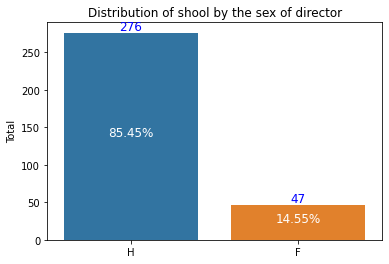

,Total,Percent
H,276,0.854489
F,47,0.145511


In [ ]:
# Make graph with gender column
prob_category(data=merge1,top_n =6,col="Sex_of_the_Director", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of shool by the sex of director",figsize=(6,4),horizontal=False)

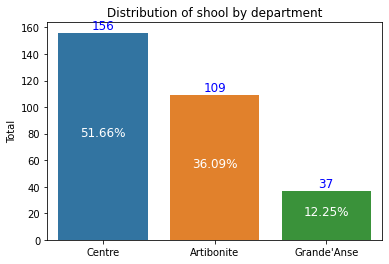

,Total,Percent
Centre,156,0.516556
Artibonite,109,0.360927
Grande'Anse,37,0.122517


In [ ]:
# Make pivotable with gender column
prob_category(data=merge1,top_n =6,col="Department", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of shool by department",figsize=(6,4),horizontal=False)

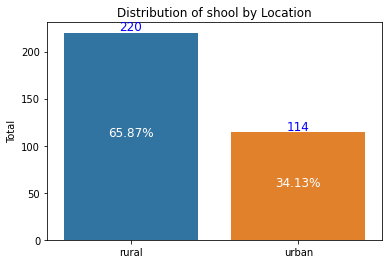

,Total,Percent
rural,220,0.658683
urban,114,0.341317


In [ ]:
# Make pivotable with gender column
prob_category(data=merge1,top_n =6,col="Location", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of shool by Location",figsize=(6,4),horizontal=False)

In [ ]:
merge1.groupby("Department")["Success_rate_for_the_9th_grade"].mean()

Department
Artibonite     0.885002
Centre         0.824972
Grande'Anse    0.732659
Name: Success_rate_for_the_9th_grade, dtype: float64

As we can see, the mean success rate by department is higher in the 3 departments we have considered for the 9th grade. The department with the higher success rate is Artibonite with 88.5%. Can we conclude that the level of education is higher in Artibonite? If so what can explain that?

In [ ]:
#Doing a pivot table to show the sex of the director group by department
Urban_Rural_by_dep=pd.pivot_table(merge1, values='Total_promus', 
                    index=['Department'],
                    columns='Sex_of_the_Director',
                    aggfunc="mean",
                    fill_value=0 )
Urban_Rural_by_dep

Sex_of_the_Director,F,H
Department,,
Artibonite,26.428571,21.854167
Centre,29.468750,35.516667
Grande'Anse,21.000000,16.393939


This pivot table shows by mean the number of student who have succeed their exam group by the sex of their director and the department in which their schools are located.

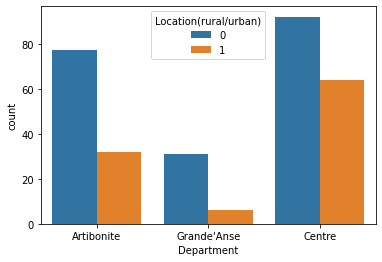

In [ ]:
ax = sns.countplot(x="Department", hue="Location(rural/urban)", data=merge1, )

In [ ]:
# merge1.columns

In [ ]:
# sns.set()  # allows you to use Seaborn styles
# sns.set_style("whitegrid")
# sns.set_context("poster", font_scale = 1)
# f, ax = plt.subplots(figsize=(20,10))

# Urban_Rural_by_dep.plot(ax=ax)

# plt.show()

In [ ]:
#Doing a pivot table to show the number of urban or rural schools group by communes
Urban_Rural_by_communes=pd.pivot_table(merge1, values='School_name_x', 
                    index=['Communes_'],
                    columns='Location',
                    aggfunc="count",
                    fill_value=0,)
Urban_Rural_by_communes

Location,rural,urban
Communes_,,
BEAUMONT,2,1
BELLADERE,16,12
BOUCAN CARRE,9,5
CHAMBELLAN,4,0
CORAIL,4,0
DESDUNES,12,10
DESSALINES,1,0
GONAIVES,1,0
GRANDE SALINE,14,1


In [ ]:
# fig = plt.figure(figsize=(12,18))
# ax = sns.countplot(y="Communes_", hue="Location(rural/urban)", data=merge1,)

In [ ]:
#Doing a pivot table to show the number of urban or rural schools group group by if they have toilet or not
Urban_Rural_by_Toilet=pd.pivot_table(merge1, values='School_name_x', 
                    index=['Toilet'],
                    columns='Location',
                    aggfunc="count",
                    fill_value=0)
Urban_Rural_by_Toilet

Location,rural,urban
Toilet,,
0.0,5,0
1.0,214,113


This graph shows the number of toilet by school, given that they are urban or rural. As we can see the number of school with toilet are elevated in the rural zone.

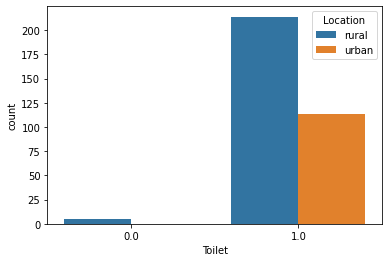

In [ ]:
ax = sns.countplot(x="Toilet", hue="Location", data=merge1, )

In [ ]:
#Doing a pivot table to show the number of urban or rural schools group group by if they have kitchen or not
Urban_Rural_by_kitchen=pd.pivot_table(merge1, values='School_name_x', 
                    index=['Department'],
                    columns='Location',
                    aggfunc="count",
                    fill_value=0)
Urban_Rural_by_kitchen

Location,rural,urban
Department,,
Artibonite,77,32
Centre,92,64
Grande'Anse,31,6


In [ ]:
merge1.school_name2

0                 ecole communautaire de diegue
1              institution mixte antenor firmin
2                      ecole bethesda de duclos
3               institution mixte la fraternite
4               emmanuel baptiste conservatrice
                         ...                   
334                          ecole mixte canaan
335            ecole nationale henry christophe
336                previdentielle mixte eliezer
337                      st mathias de thomonde
338    ecole nle marie auxiliatrice de thomonde
Name: school_name2, Length: 334, dtype: object

In [ ]:
#Doing a pivot table to show the number of urban or rural schools group group by if they have water or not
Urban_Rural_by_water=pd.pivot_table(merge1, values='School_name_x', 
                    index=['water'],
                    columns='Location(rural/urban)',
                    aggfunc="count",
                    fill_value=0)
Urban_Rural_by_water

Location(rural/urban),0,1
water,,
0.0,22,6
1.0,197,108


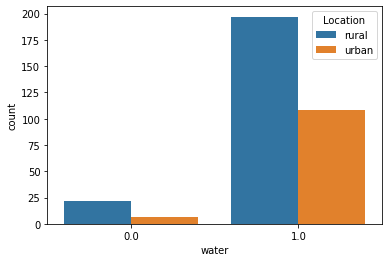

In [ ]:
ax = sns.countplot(x="water", hue="Location", data=merge1, )

In [ ]:
#Doing a pivot table to show the number of urban or rural schools group group by if they have water or not
Urban_Rural_by_drinking_water=pd.pivot_table(merge1, values='School_name_x', 
                    index=['drinking_water'],
                    columns='Location(rural/urban)',
                    aggfunc="count",
                    fill_value=0)
Urban_Rural_by_drinking_water

Location(rural/urban),0,1
drinking_water,,
0.0,29,10
1.0,185,100


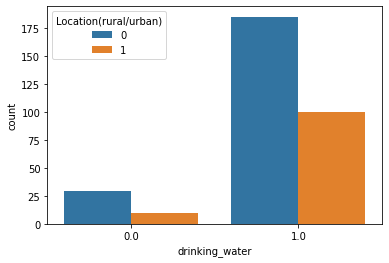

In [ ]:
ax = sns.countplot(x="drinking_water", hue="Location(rural/urban)", data=merge1, )

In [ ]:
pd.pivot_table(data=merge1,index="Department",columns="Sex_of_the_Director",values="Success_rate_for_the_9th_grade",aggfunc="mean",fill_value=0)

Sex_of_the_Director,F,H
Department,,
Artibonite,1.000000,0.880772
Centre,0.935819,0.793835
Grande'Anse,0.000000,0.732659


In [ ]:
pd.pivot_table(data=merge1,values="Success_rate_for_the_9th_grade",columns=["Department","Communes_","Location"],aggfunc="mean")

Department                     Artibonite            ... Grande'Anse          
Communes_                        DESDUNES            ...   LES IROIS    PESTEL
Location                            rural     urban  ...       rural     rural
Success_rate_for_the_9th_grade   0.708333  0.849003  ...         1.0  0.666667

[1 rows x 31 columns]

In [ ]:
pd.pivot_table(data=merge1,columns="Location",values="Success_rate_for_the_9th_grade",aggfunc="mean")

Location,rural,urban
Success_rate_for_the_9th_grade,0.840051,0.841592


In [ ]:
# merge1.fillna(0, inplace=True)
merge1.columns

Index(['Code', 'School_name_x', 'Promus female 6th grade 2016-2017',
       'Promus male 6th grade 2016-2017',
       'Redoublants female 6th grade 2016 – 2017',
       'Redoublants male 6th grade 2016 – 2017',
       'Listes de classe female 6th grade 2017-2018',
       'Listes de classe male 6th grade 2017-2018',
       'Promus female 9th grade 2016-2017', 'Promus male 9th grade 2016-2017',
       'Redoublants female 9th grade 2016 – 2017',
       'Redoublants male 9th grade 2016 – 2017',
       'Listes de classe female 9th grade 2017-2018',
       'Listes de classe male 9th grade 2017-2018',
       'Promus female Terminale grade 2016-2017',
       'Promus male Terminale grade 2016-2017',
       'Redoublants female Terminale grade 2016 – 2017',
       'Redoublants male Terminale grade 2016 – 2017',
       'Listes de classe female Terminale grade 2017-2018',
       'Listes de classe male Terminale grade 2017-2018',
       'Total_promus_6th_grade_by_school', 'Total_promus_9th_grade_by_

In [ ]:
result6=pd.pivot_table(merge1[merge1['Kitchen']==1],values='No',index=['Department','Communes_','Location'], aggfunc='count', margins=True)
result6

No
Department  Communes_                      Location     
Artibonite  DESDUNES                       rural      12
                                           urban      10
            DESSALINES                     rural       1
            GONAIVES                       rural       1
            GRANDE SALINE                  rural      14
                                           urban       1
            L'ESTERE                       rural      30
                                           urban      11
            LA CHAPELLE                    urban       2
            PETITE RIVIERE DE L'ARTIBONITE urban       1
            SAINT-MARC                     rural      12
                                           urban       1
            VERRETTES                      rural       6
                                           urban       5
Centre      BELLADERE                      rural      15
                                           urban      12
            BOUCAN CARRE                   rural       9
                                           urban       5
            HINCHE                         rural      18
                                           urban      13
            LASCAHOBAS                     rural      15
                                           urban      10
            MAISSADE                       rural      15
                                           urban      10
            MIREBALAIS                     rural      18
                                           urban       6
            THOMONDE                       rural       1
                                           urban       8
Grande'Anse BEAUMONT                       rural       2
                                           urban       1
            CHAMBELLAN                     rural       4
            CORAIL                         rural       4
            JEREMIE                        rural       8
                                           urban       5
            LES IROIS                      rural       1
            PESTEL                         rural       5
            ROSEAUX                        rural       4
All                                                  296

In [ ]:
result7=pd.pivot_table(merge1[merge1['Toilet']==1],values='No',index=['Department','Communes_','Location'], aggfunc='count', )
result7

No
Department  Communes_                      Location    
Artibonite  DESDUNES                       rural     12
                                           urban     10
            DESSALINES                     rural      1
            GONAIVES                       rural      1
            GRANDE SALINE                  rural     14
                                           urban      1
            L'ESTERE                       rural     30
                                           urban     12
            LA CHAPELLE                    urban      2
            PETITE RIVIERE DE L'ARTIBONITE urban      1
            SAINT-MARC                     rural     12
                                           urban      1
            VERRETTES                      rural      6
                                           urban      5
Centre      BELLADERE                      rural     16
                                           urban     12
            BOUCAN CARRE                   rural      9
                                           urban      5
            HINCHE                         rural     18
                                           urban     13
            LASCAHOBAS                     rural     15
                                           urban     10
            MAISSADE                       rural     15
                                           urban     10
            MIREBALAIS                     rural     18
                                           urban      6
            THOMONDE                       rural      1
                                           urban      7
Grande'Anse BEAUMONT                       rural      2
                                           urban      1
            CHAMBELLAN                     rural      3
            CORAIL                         rural      4
            JEREMIE                        rural      7
                                           urban      5
            LES IROIS                      rural      1
            PESTEL                         rural      7
            ROSEAUX                        rural      4

In [ ]:
#Transform the sex of the director in 0 or 1 
merge1['Sex_of_the_Director1']= np.where(merge1['Sex_of_the_Director']=="H",1,0,)
merge1

,Code,School_name_x,Promus female 6th grade 2016-2017,Promus male 6th grade 2016-2017,Redoublants female 6th grade 2016 – 2017,Redoublants male 6th grade 2016 – 2017,Listes de classe female 6th grade 2017-2018,Listes de classe male 6th grade 2017-2018,Promus female 9th grade 2016-2017,Promus male 9th grade 2016-2017,Redoublants female 9th grade 2016 – 2017,Redoublants male 9th grade 2016 – 2017,Listes de classe female 9th grade 2017-2018,Listes de classe male 9th grade 2017-2018,Promus female Terminale grade 2016-2017,Promus male Terminale grade 2016-2017,Redoublants female Terminale grade 2016 – 2017,Redoublants male Terminale grade 2016 – 2017,Listes de classe female Terminale grade 2017-2018,Listes de classe male Terminale grade 2017-2018,Total_promus_6th_grade_by_school,Total_promus_9th_grade_by_school,Total_promus_Terminale_grade_by_school,Total_promus,Total_redoublants_6th_by_shcool,Total_redoublants_9th_by_shcool,Total_redoublants_Terminale_by_shcool,Total_list_of_the_classes_6th_by_school,Total_list_of_the_classes_9th_by_school,Total_list_of_the_classes_Terminale_by_school,Success_rate_for_the_6th_grade,Success_rate_for_the_9th_grade,Success_rate_for_the_Final_grade,Non_success_rate_for_the_6th_grade,Non_success_rate_for_the_9th_grade,Non_success_rate_for_the_Final_grade,Column1,No,School_name_y,urban,...,locality,sec_communales,commune_rural,Sex_of_the_Director,Email,Kitchen,Toilet,Toilet_clean(yes_no),toilet_operationnal,Toilet_en_bon_etat,water,number_of_water_sources,drinking_water,number_of_drinking_water_source,drinking_water_is_free_for_students,school_name2,DATE,Communes,Department,Communes_,Geometry,total_number_of_inhabitants,total_number_of_female,total_number_of_male,Rate_of_toilet_en_bon_etat,Number_of_toilet_operationnal_per_student_6th_grade,Number_of_toilet_operationnal_per_student_9th_grade,Number_of_toilet_operationnal_per_student_Final_grade,Number_of_toilet_en_bon_etat_per_student_6th_grade,Number_of_toilet_en_bon_etat_per_student_9th_grade,Number_of_toilet_en_bon_etat_per_student_Final_grade,Number_of_toilet_operationnal_per_100students_6th_grade,Number_of_toilet_operationnal_per_100students_9th_grade,Number_of_toilet_operationnal_per_100students_Final_grade,Number_of_toilet_en_bon_etat_per_100students_6th_grade,Number_of_toilet_en_bon_etat_per_100students_9th_grade,Number_of_toilet_en_bon_etat_per_100students_Final_grade,Sex_of_the_Director1,Location(rural/urban),Location
0,ARDE-01,ECOLE COMMUNAUTAIRE DE DIEGUE,44,43,0,1,36,46,4,5,1,0,8,16,0,0,0,0,0,0,87,9,0,96,1,1,0,82,24,0,0.988636,0.900000,NaN,0.01,0.100000,NaN,0.0,1.0,ECOLE COMMUNAUTAIRE DE DIEGUE,NaN,...,DIEGUE (TETE BOEUF),7EME SECTION,ST-MICHEL,H,francoisasnel88@yahoo.com,1.0,1.0,1.0,8.0,4.0,1.0,2.0,1.0,1.0,1.0,ecole communautaire de diegue,2018-05-24,ST-MICHEL,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.097561,0.333333,NaN,0.048780,0.166667,NaN,9.756098,33.333333,NaN,4.878049,16.666667,NaN,1,0,rural
1,ARDE-02,INSTITUTION MIXTE ANTENOR FIRMIN,14,16,7,8,18,26,21,11,4,5,17,14,0,0,0,0,0,0,30,32,0,62,15,9,0,44,31,0,0.666667,0.780488,NaN,0.33,0.219512,NaN,1.0,2.0,INSTITUTION MIXTE ANTENOR FIRMIN,NaN,...,HATTE GRAND-MONT,3EME SECTION OGE,MARCHAND DESSALINES,H,NaN,1.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,institution mixte antenor firmin,2018-05-25,MARCHAND DESSALINES,Artibonite,DESSALINES,POLYGON ((-72.49478415299996 19.33161537500007...,215559.787159,107037.0,108521.0,0.2,0.113636,0.161290,NaN,0.022727,0.032258,NaN,11.363636,16.129032,NaN,2.272727,3.225806,NaN,1,0,rural
2,ARDU-01,ECOLE BETHESDA DE DUCLOS,20,21,4,3,10,18,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,41,7,0,0,28,0,0,0.854167,NaN,NaN,0.15,NaN,NaN,2.0,3.0,ECOLE BETHESDA DE DUCLOS,NaN,...,DUCLOS,DUCLOS,DESDUNES,H,NaN,1.0,1.0,1.0,4.0,4.0,1.0,6.0,1.0,3.0,1.0,ecole bethesda de duclos,2018-05-28,DESDUNES,Artibonite,DESDUNES,POLYGON ((-72.73958671099996 19.36593147100007...,43876.373845,21826.0,22050.0,1.0,0.142857,NaN,NaN,0.142857,NaN,NaN,14.285714,NaN,NaN,14.285714,NaN,NaN,1,0,rural
3,ARDU-02,INSTITUTION MIXTE LA FRA

In [ ]:
table1=pd.pivot_table(data=merge1,columns="Location",values="Success_rate_for_the_9th_grade",aggfunc="mean")

In [ ]:
table1

Location,rural,urban
Success_rate_for_the_9th_grade,0.840051,0.841592


In [ ]:
# # Example of the Chi-Squared Test
# from scipy.stats import chi2_contingency
# table=table1
# stat, p, dof, expected = chi2_contingency(table1)
# print('stat=%.8f, p=%.8f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

In [ ]:
from scipy import stats
jarque_bera_test = stats.jarque_bera(merge1['Total_promus_9th_grade_by_school'])
jarque_bera_test

(5016.6529417110105, 0.0)

In [ ]:
import numpy as np
import scipy.stats as stats

#perform Jarque-Bera test
stat, p= stats.jarque_bera(merge1['Total_promus_9th_grade_by_school'])
print((stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

(5016.6529417110105, 0.0)
Probably not Gaussian


In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(merge1['Total_promus_9th_grade_by_school'])
print((stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

(0.5336190462112427, 8.258514592538175e-29)
Probably not Gaussian


In [ ]:
merge1.fillna(0,inplace=True)

In [ ]:
from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(merge1["Success_rate_for_the_9th_grade"], merge1["number_of_drinking_water_source"])

F_onewayResult(statistic=181.50544148557475, pvalue=9.284958056826293e-37)

In [ ]:
# ax=sns.boxplot(x=merge1.number_of_drinking_water_source)

In [ ]:

# #number of drinking water source distribution on the whole dataset
# ax = sns.displot(merge1.number_of_drinking_water_source,
#                   bins=10,
#                   kde=True,
#                   color=None)
# ax.set(xlabel='', ylabel='Frequency', title="number of drinking water source distribution on the whole dataset")

In [ ]:
# column name
columns=["Total_promus", 'Toilet_en_bon_etat','number_of_water_sources','number_of_drinking_water_source',"Rate_of_toilet_en_bon_etat",'Success_rate_for_the_6th_grade', 'Success_rate_for_the_9th_grade','Success_rate_for_the_Final_grade']
 
# create a dataframe with the above values and column names 
dataset=pd.DataFrame(data=merge1,columns=columns)
 
# to find the correlation, use corr() method on the dataset
corr=dataset.corr()
 
# plt.xticks(range(len(columns)),columns,rotation=90)
# plt.yticks(range(len(columns)),columns)
# plt.imshow(corr, cmap='hot',interpolation="nearest")

In [ ]:
# sns.pairplot(data=merge1,hue="Department")

In [ ]:
merge1['Communes_'].nunique()

24

In [ ]:
# merge1.drop(columns=['Code', 'Promus female 6th grade 2016-2017',
#        'Promus male 6th grade 2016-2017',
#        'Redoublants female 6th grade 2016 – 2017',
#        'Redoublants male 6th grade 2016 – 2017',
#        'Listes de classe female 6th grade 2017-2018',
#        'Listes de classe male 6th grade 2017-2018',
#        'Promus female 9th grade 2016-2017', 'Promus male 9th grade 2016-2017',
#        'Redoublants female 9th grade 2016 – 2017',
#        'Redoublants male 9th grade 2016 – 2017',
#        'Listes de classe female 9th grade 2017-2018',
#        'Listes de classe male 9th grade 2017-2018',
#        'Promus female Terminale grade 2016-2017',
#        'Promus male Terminale grade 2016-2017',
#        'Redoublants female Terminale grade 2016 – 2017',
#        'Redoublants male Terminale grade 2016 – 2017',
#        'Listes de classe female Terminale grade 2017-2018',
#        'Listes de classe male Terminale grade 2017-2018', 'urban', 'rural', 'commune', 'locality',
#        'sec_communales', 'commune_rural','Kitchen', 'Toilet', 'Toilet_clean(yes_no)','school_name2','Number_of_toilet_operationnal_per_student_6th_grade',
#        'Number_of_toilet_operationnal_per_student_9th_grade',
#        'Number_of_toilet_operationnal_per_student_Final_grade',
#        'Number_of_toilet_en_bon_etat_per_student_6th_grade',
#        'Number_of_toilet_en_bon_etat_per_student_9th_grade',
#        'Number_of_toilet_en_bon_etat_per_student_Final_grade',
#        'Number_of_toilet_operationnal_per_100students_6th_grade',
#        'Number_of_toilet_operationnal_per_100students_9th_grade',
#        'Number_of_toilet_operationnal_per_100students_Final_grade',
#        'Number_of_toilet_en_bon_etat_per_100students_6th_grade',
#        'Number_of_toilet_en_bon_etat_per_100students_9th_grade',
#        'Number_of_toilet_en_bon_etat_per_100students_Final_grade'], inplace=True)

In [ ]:
X=merge1[["Total_promus", 'Toilet_en_bon_etat','number_of_water_sources','number_of_drinking_water_source',"Rate_of_toilet_en_bon_etat",'Success_rate_for_the_6th_grade', 'Success_rate_for_the_9th_grade','Success_rate_for_the_Final_grade']]
X

,Total_promus,Toilet_en_bon_etat,number_of_water_sources,number_of_drinking_water_source,Rate_of_toilet_en_bon_etat,Success_rate_for_the_6th_grade,Success_rate_for_the_9th_grade,Success_rate_for_the_Final_grade
0,96,4.0,2.0,1.0,0.5,0.988636,0.900000,0.0
1,62,1.0,1.0,0.0,0.2,0.666667,0.780488,0.0
2,41,4.0,6.0,3.0,1.0,0.854167,0.000000,0.0
3,12,3.0,1.0,1.0,1.0,0.923077,0.000000,0.0
4,27,3.0,0.0,0.0,1.0,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
334,101,0.0,4.0,0.0,0.0,0.891304,0.937500,0.0
335,0,0.0,7.0,1.0,0.0,0.000000,0.000000,0.0
336,9,3.0,1.0,6.0,1.0,1.000000,0.000000,0.0
337,35,10.0,2.0,2.0,1.0,0.727273,1.000000,0.0


In [ ]:
# from yellowbrick.cluster import KElbowVisualizer

# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,12))

# visualizer.fit(X)        # Fit the data to the visualizer
# ##visualizer.show()        # Finalize and render the figure

In [ ]:
# import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imp_mean.fit_transform(X)
X = pd.DataFrame(data=data, columns=list(X.columns))
minmaxscaler = MinMaxScaler()
data=minmaxscaler.fit_transform(X)
X = pd.DataFrame(data=data, columns=list(X.columns))


In [ ]:
inertia=[]
K_range=range(1,10)
for k in K_range:
  model=KMeans(n_clusters=k).fit(X)
  inertia.append(model.inertia_)


Text(0, 0.5, 'Cout du modele')

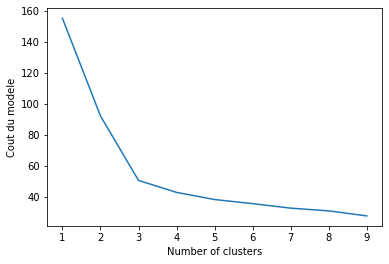

In [ ]:
plt.plot(K_range,inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Cout du modele")

In [ ]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')

imputer = imputer.fit(X.iloc[:, 0:5])
X = imputer.transform(X.iloc[:, 0:5])

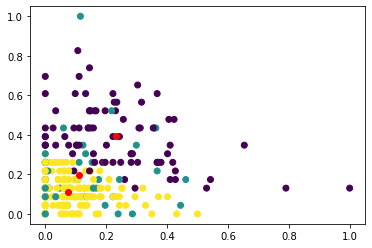

In [ ]:
model=KMeans(n_clusters=3, random_state=42)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="r")

In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = ''),yaxis = dict(title  = ''),zaxis = dict(title  = ''))

In [ ]:
# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
labels= model.labels_

In [ ]:
merge1['clusters'] = labels
merge1['clusters_L'] =merge1['clusters'].apply(lambda x : f"Profile {int(x)+1}")

In [ ]:
merge1

,Code,School_name_x,Promus female 6th grade 2016-2017,Promus male 6th grade 2016-2017,Redoublants female 6th grade 2016 – 2017,Redoublants male 6th grade 2016 – 2017,Listes de classe female 6th grade 2017-2018,Listes de classe male 6th grade 2017-2018,Promus female 9th grade 2016-2017,Promus male 9th grade 2016-2017,Redoublants female 9th grade 2016 – 2017,Redoublants male 9th grade 2016 – 2017,Listes de classe female 9th grade 2017-2018,Listes de classe male 9th grade 2017-2018,Promus female Terminale grade 2016-2017,Promus male Terminale grade 2016-2017,Redoublants female Terminale grade 2016 – 2017,Redoublants male Terminale grade 2016 – 2017,Listes de classe female Terminale grade 2017-2018,Listes de classe male Terminale grade 2017-2018,Total_promus_6th_grade_by_school,Total_promus_9th_grade_by_school,Total_promus_Terminale_grade_by_school,Total_promus,Total_redoublants_6th_by_shcool,Total_redoublants_9th_by_shcool,Total_redoublants_Terminale_by_shcool,Total_list_of_the_classes_6th_by_school,Total_list_of_the_classes_9th_by_school,Total_list_of_the_classes_Terminale_by_school,Success_rate_for_the_6th_grade,Success_rate_for_the_9th_grade,Success_rate_for_the_Final_grade,Non_success_rate_for_the_6th_grade,Non_success_rate_for_the_9th_grade,Non_success_rate_for_the_Final_grade,Column1,No,School_name_y,urban,...,commune_rural,Sex_of_the_Director,Email,Kitchen,Toilet,Toilet_clean(yes_no),toilet_operationnal,Toilet_en_bon_etat,water,number_of_water_sources,drinking_water,number_of_drinking_water_source,drinking_water_is_free_for_students,school_name2,DATE,Communes,Department,Communes_,Geometry,total_number_of_inhabitants,total_number_of_female,total_number_of_male,Rate_of_toilet_en_bon_etat,Number_of_toilet_operationnal_per_student_6th_grade,Number_of_toilet_operationnal_per_student_9th_grade,Number_of_toilet_operationnal_per_student_Final_grade,Number_of_toilet_en_bon_etat_per_student_6th_grade,Number_of_toilet_en_bon_etat_per_student_9th_grade,Number_of_toilet_en_bon_etat_per_student_Final_grade,Number_of_toilet_operationnal_per_100students_6th_grade,Number_of_toilet_operationnal_per_100students_9th_grade,Number_of_toilet_operationnal_per_100students_Final_grade,Number_of_toilet_en_bon_etat_per_100students_6th_grade,Number_of_toilet_en_bon_etat_per_100students_9th_grade,Number_of_toilet_en_bon_etat_per_100students_Final_grade,Sex_of_the_Director1,Location(rural/urban),Location,clusters,clusters_L
0,ARDE-01,ECOLE COMMUNAUTAIRE DE DIEGUE,44,43,0,1,36,46,4,5,1,0,8,16,0,0,0,0,0,0,87,9,0,96,1,1,0,82,24,0,0.988636,0.900000,0.0,0.01,0.100000,0.0,0.0,1.0,ECOLE COMMUNAUTAIRE DE DIEGUE,0.0,...,ST-MICHEL,H,francoisasnel88@yahoo.com,1.0,1.0,1.0,8.0,4.0,1.0,2.0,1.0,1.0,1.0,ecole communautaire de diegue,2018-05-24,ST-MICHEL,0,0,0,0.000000,0.0,0.0,0.5,0.097561,0.333333,0.0,0.048780,0.166667,0.0,9.756098,33.333333,0.0,4.878049,16.666667,0.0,1,0,rural,0,Profile 1
1,ARDE-02,INSTITUTION MIXTE ANTENOR FIRMIN,14,16,7,8,18,26,21,11,4,5,17,14,0,0,0,0,0,0,30,32,0,62,15,9,0,44,31,0,0.666667,0.780488,0.0,0.33,0.219512,0.0,1.0,2.0,INSTITUTION MIXTE ANTENOR FIRMIN,0.0,...,MARCHAND DESSALINES,H,0,1.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,institution mixte antenor firmin,2018-05-25,MARCHAND DESSALINES,Artibonite,DESSALINES,POLYGON ((-72.49478415299996 19.33161537500007...,215559.787159,107037.0,108521.0,0.2,0.113636,0.161290,0.0,0.022727,0.032258,0.0,11.363636,16.129032,0.0,2.272727,3.225806,0.0,1,0,rural,2,Profile 3
2,ARDU-01,ECOLE BETHESDA DE DUCLOS,20,21,4,3,10,18,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,41,7,0,0,28,0,0,0.854167,0.000000,0.0,0.15,0.000000,0.0,2.0,3.0,ECOLE BETHESDA DE DUCLOS,0.0,...,DESDUNES,H,0,1.0,1.0,1.0,4.0,4.0,1.0,6.0,1.0,3.0,1.0,ecole bethesda de duclos,2018-05-28,DESDUNES,Artibonite,DESDUNES,POLYGON ((-72.73958671099996 19.36593147100007...,43876.373845,21826.0,22050.0,1.0,0.142857,0.000000,0.0,0.142857,0.000000,0.0,14.285714,0.000000,0.0,14.285714,0.000000,0.0,1,0,rural,1,Profile 2
3,ARDU-02,INSTITUTION MIXTE LA FRATERNITE,6,6,0,1,10,7,0,0

In [ ]:
merge1["Score"] = merge1["Kitchen"]*0.15 + merge1["Toilet"]*0.25 + merge1["water"]*0.17 + merge1["drinking_water"]*0.23 + merge1["drinking_water_is_free_for_students"]*0.2

In [ ]:
merge1["Score_std"] = (merge1["Score"] - merge1["Score"].min())/(merge1["Score"].max() - merge1["Score"].min())

In [ ]:
merge1["class"] = merge1["Score_std"].apply(lambda x: "Good" if x>=0.6 else "Bad")

In [ ]:
merge1["class"].value_counts().to_frame()

,class
Good,264
Bad,70


In [ ]:
p = pd.crosstab(merge1["class"], merge1["Success_rate_for_the_Final_grade"])

In [ ]:
# chi2_contingency(p)

In [ ]:
model.inertia_

22.207298350192577

In [ ]:
Location=pd.pivot_table(data=merge1,index="Location",columns="clusters_L",values="Code",aggfunc= "count")

In [ ]:
#Chi-Squared Test
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(Location)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=2.374, p=0.305
Probably independent


In [ ]:
Location=pd.pivot_table(data=merge1,columns="Location",index="clusters_L",values="Code",aggfunc= "count",margins=True, fill_value=0)
Location['rural'] = Location["rural"]/Location["All"]
Location['urban'] = Location["urban"]/Location["All"]
Location

Location,rural,urban,All
clusters_L,,,
Profile 1,0.604938,0.395062,81
Profile 2,0.739130,0.260870,46
Profile 3,0.661836,0.338164,207
All,0.658683,0.341317,334


In [ ]:
Sex_of_directorr=pd.pivot_table(data=merge1,columns="Sex_of_the_Director",index="clusters_L",values="Code",aggfunc= "count",margins=True, fill_value=0)
Sex_of_directorr['H'] = Sex_of_directorr["H"]/Sex_of_directorr["All"]
Sex_of_directorr['F'] = Sex_of_directorr["F"]/Sex_of_directorr["All"]
Sex_of_directorr

Sex_of_the_Director,0,F,H,All
clusters_L,,,,
Profile 1,0,0.185185,0.814815,81
Profile 2,3,0.108696,0.826087,46
Profile 3,8,0.130435,0.830918,207
All,11,0.140719,0.826347,334


In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(Sex_of_directorr)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=6.986, p=0.639
Probably independent


In [ ]:
Department=pd.pivot_table(data=merge1,columns="Department",index="clusters_L",values="Code",aggfunc= "count",margins=True, fill_value=0)
Department["Grande'Anse"] = Department["Grande'Anse"]/Department["All"]
Department['Centre'] = Department["Centre"]/Department["All"]
Department['Artibonite'] = Department["Artibonite"]/Department["All"]
Department

Department,0,Artibonite,Centre,Grande'Anse,All
clusters_L,,,,,
Profile 1,10,0.222222,0.617284,0.037037,81
Profile 2,2,0.413043,0.500000,0.043478,46
Profile 3,20,0.347826,0.400966,0.154589,207
All,32,0.326347,0.467066,0.110778,334


In [ ]:
# # Example of the Chi-Squared Test
# from scipy.stats import chi2_contingency

# stat, p, dof, expected = chi2_contingency(Department)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

In [ ]:
# # Example of the Analysis of Variance Test
# from scipy.stats import f_oneway
# data1 = merge1[merge1.clusters ==0]['Total_promus']
# data2 = merge1[merge1.clusters ==1]['Total_promus']
# data3 = merge1[merge1.clusters ==2]['Total_promus']
# stat, p = f_oneway(data1, data2, data3)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably the same distribution')
# else:
# 	print('Probably different distributions')

In [ ]:
# # Example of the Analysis of Variance Test
# from scipy.stats import f_oneway
# data1 = merge1[merge1.clusters ==0]['Success_rate_for_the_9th_grade']
# data2 = merge1[merge1.clusters ==1]['Success_rate_for_the_9th_grade']
# data3 = merge1[merge1.clusters ==2]['Success_rate_for_the_9th_grade']
# stat, p = f_oneway(data1, data2, data3)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably the same distribution')
# else:
# 	print('Probably different distributions')

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?